<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related-Python/blob/main/Darwin_finch_beak_Hypothesis_testing%2C_permutation%2C_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

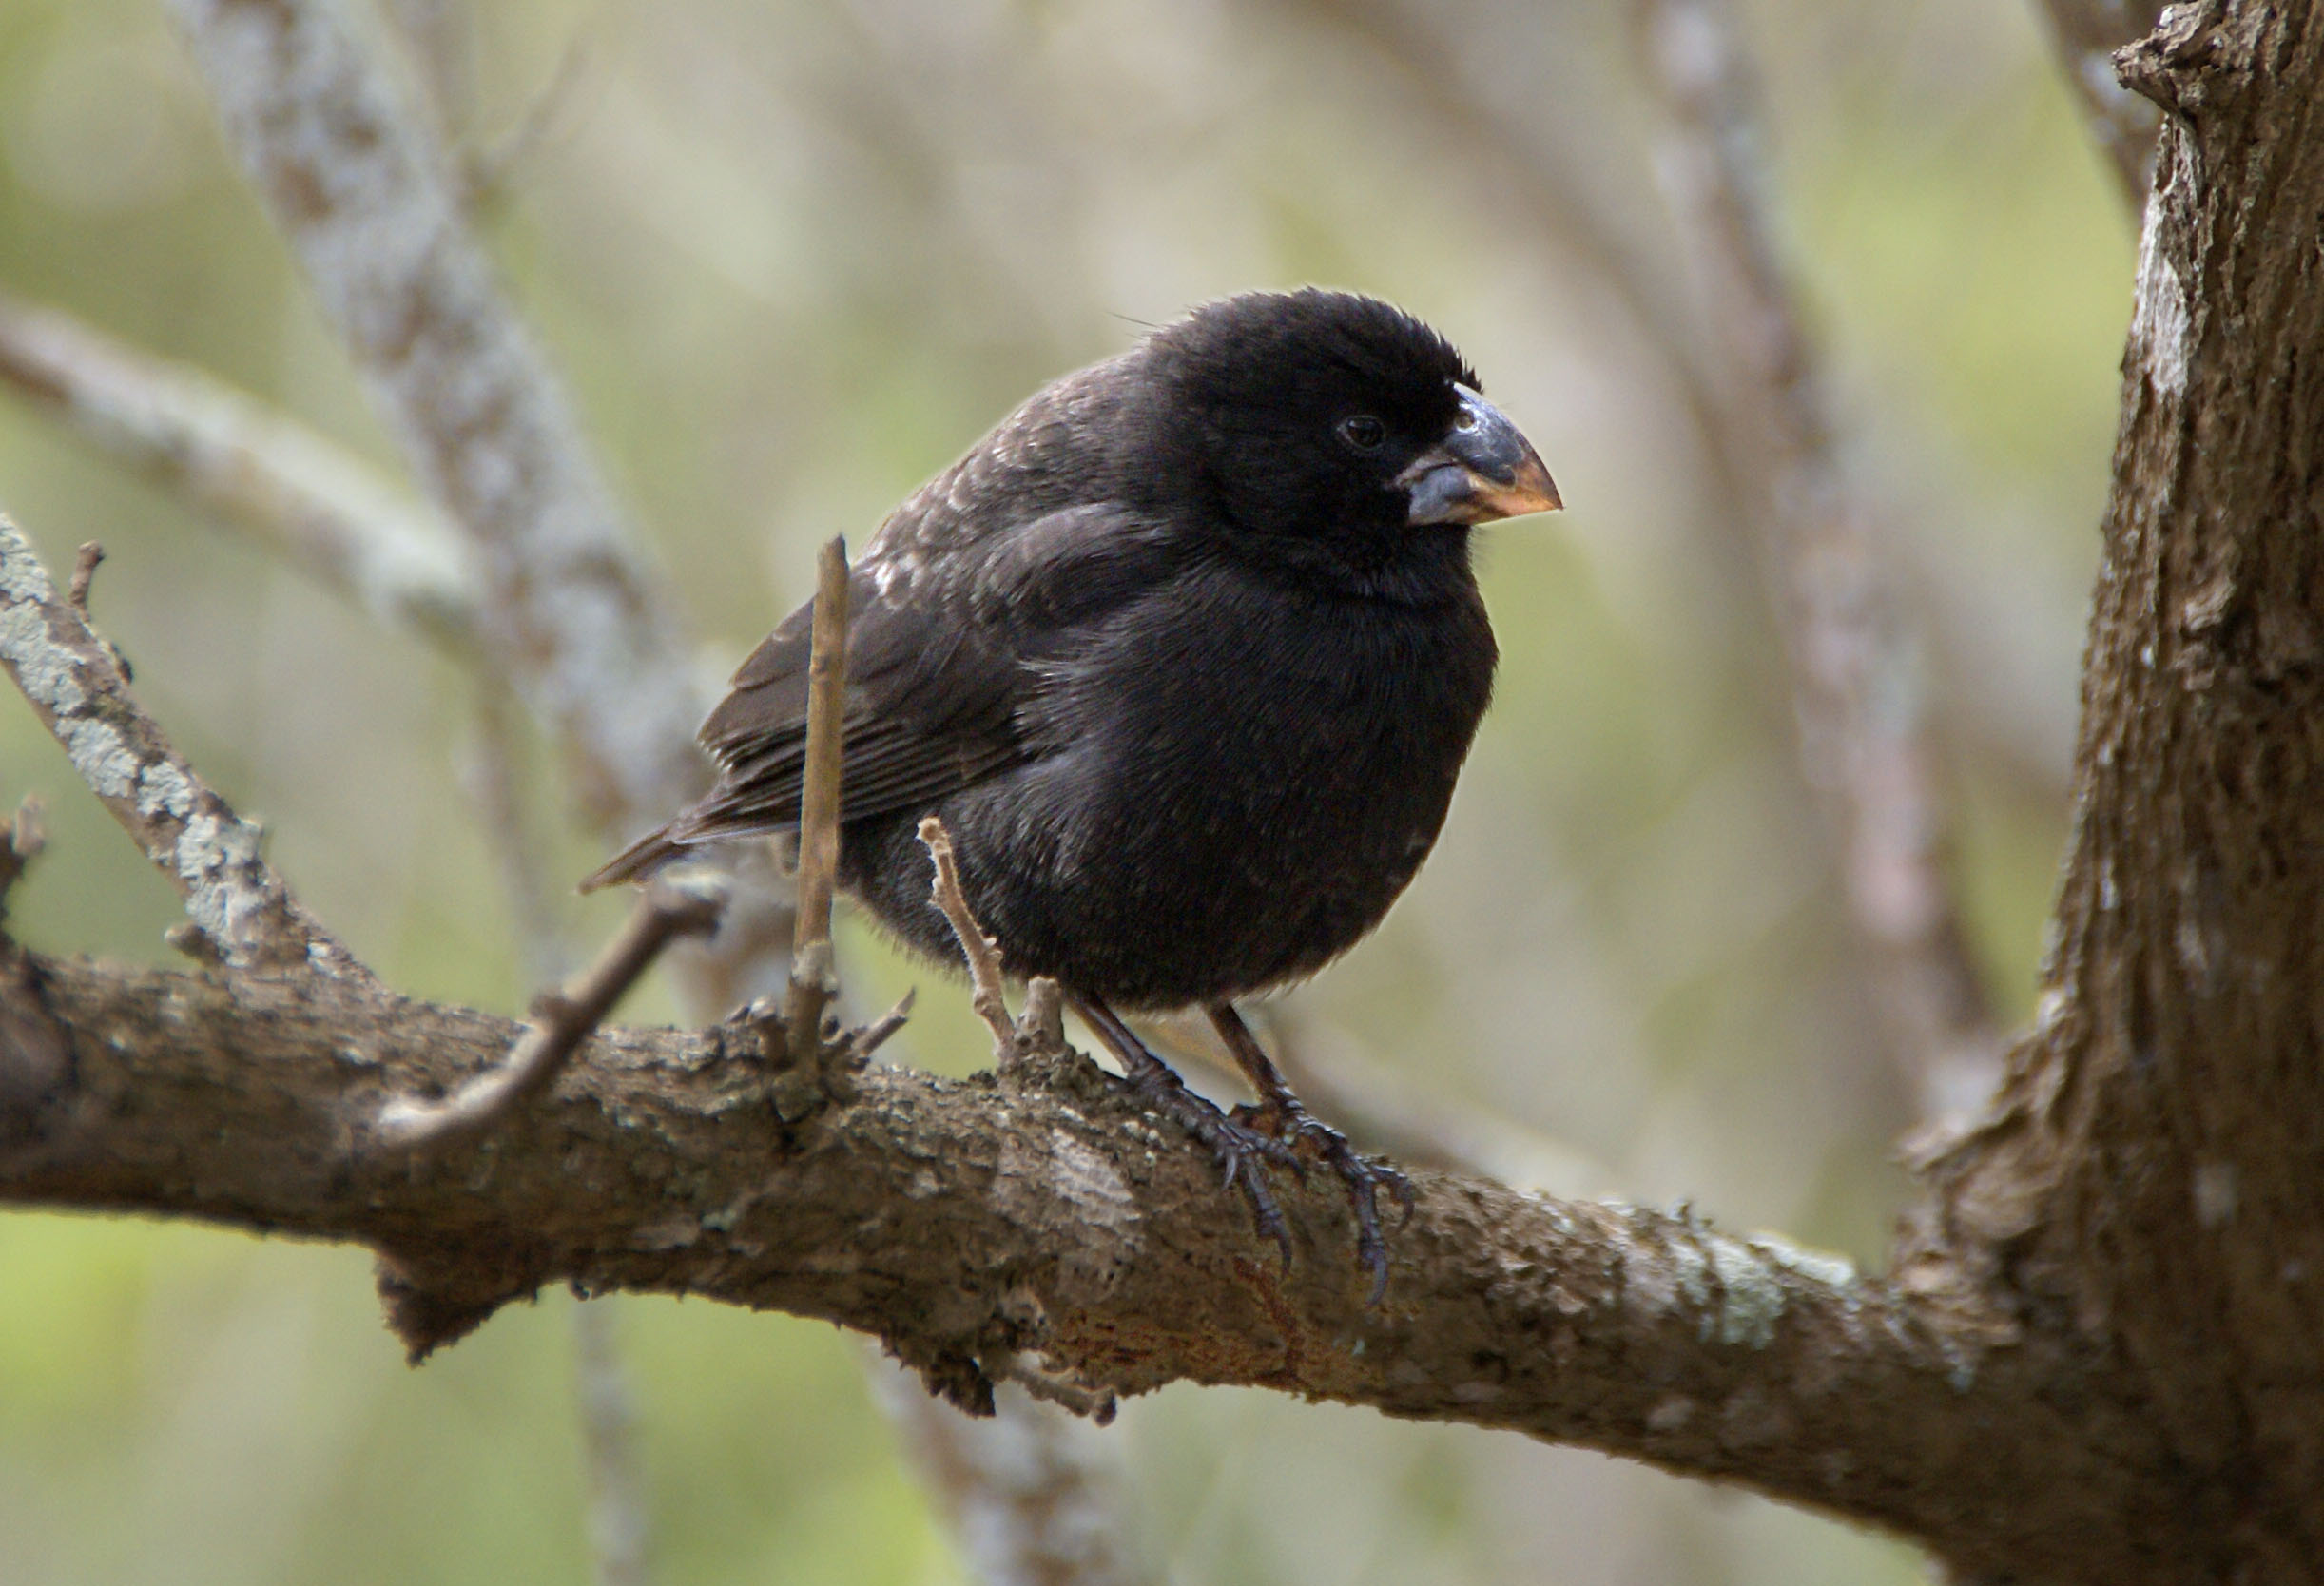

# EDA of beak depths and lengths of Darwin's finches G. Scandens

I will work with Darwin finch data, focusing on how the beak depth and length  of the finch species Geospiza Scandens has changed over time.

The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. 

These effects can lead to changes in the species over time.

I will statistically compare the beak depth and length of G. scandens on Daphne Major Island in 1975 and in 2012. To start, we need some EDA:

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_palette("tab10", 8, 0.6)

## Importing and visualizing head tables.

In [ ]:
# Using DataCamp repository
d_1975 = 'https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv'
d_2012 = 'https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv'
df_1975 = pd.read_csv(d_1975, index_col='band')
df_2012 = pd.read_csv(d_2012, index_col='band')

# Print shapes and 1975 table:
print('The DataFrame has a shape of: ', df_1975.shape, 'and the head for the year 1975:')
display(df_1975.head())

print('\n' 'The DataFrame has a shape of: ', df_2012.shape, 'and the head for the year 2012:')
display(df_2012.head())


The DataFrame has a shape of:  (403, 3) and the head for the year 1975:


,species,"Beak length, mm","Beak depth, mm"
band,,,
2,fortis,9.4,8.0
9,fortis,9.2,8.3
12,fortis,9.5,7.5
15,fortis,9.5,8.0
305,fortis,11.5,9.9



The DataFrame has a shape of:  (248, 3) and the head for the year 2012:


,species,blength,bdepth
band,,,
19022,fortis,10.0,8.5
19028,fortis,12.5,8.9
19032,fortis,9.3,7.5
19041,fortis,10.3,9.6
19044,fortis,11.0,9.2


## Changing columns names, exploring species categorical variable and subsetting

In [ ]:
# how many species of birds are inside this dataset? G. Scandens is the only one needed for the analysis.
print(df_2012.species.unique())

# Subsetting the DataFrame to only G. Scandens species.
df_2012 = df_2012[df_2012.species=='scandens']
df_1975 = df_1975[df_1975.species=='scandens']

['scandens']


In [ ]:
# It's better to concatenate both datasets into one
# First change column names so both have the same.
df_2012.columns = df_1975.columns

# Add a new columns 'year' 
df_2012['year'] = 2012
df_1975['year'] = 1975

# Concatenate 
df = pd.concat([df_1975, df_2012], ignore_index=True)
print(df.shape)
df.head()

(214, 4)


,species,"Beak length, mm","Beak depth, mm",year
0,scandens,13.9,8.4,1975
1,scandens,14.0,8.8,1975
2,scandens,12.9,8.4,1975
3,scandens,13.5,8.0,1975
4,scandens,12.9,7.9,1975


## Beak Depth EDA and sample mean calculation

It's always recommended to plot the observations. 

In this case we only have 214 samples, therefore a Bee Swarm plot could be useful.

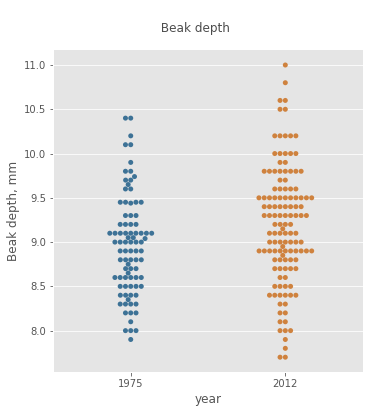

In [ ]:
# Create bee swarm plot for beak depth

g = sns.catplot(kind='swarm',data=df, x='year', y='Beak depth, mm', hue='year')
g.fig.suptitle("\n Beak depth", y= 1.09, alpha=0.7)

plt.show()

It seems there are more samples in 2012 than in 1975. The bee swarm plot depicts higher variance in 2012 and maybe higher mean.

In [ ]:
# Are there more samples in 2012 than in 1975?

num_samples_1975 = df[df.year==1975].shape[0]
num_samples_2012 = df[df.year==2012].shape[0]

print('The number of samples in 1975 are {} and in 2012 {}.'.format(num_samples_1975, num_samples_2012))

The number of samples in 1975 are 87 and in 2012 127.


In [ ]:
# Calculate the mean Beak depth of each period.

mean_1975 = df[df.year==1975]['Beak depth, mm'].mean()
mean_2012 = df[df.year==2012]['Beak depth, mm'].mean()

print('The mean in 1975 is {:.2f} and in 2012 {:.2f}.'.format(mean_1975, mean_2012))

The mean in 1975 is 8.96 and in 2012 9.19.


ECDF visualization (Empirical cumulative Distribution Function)

While bee swarm plots are useful, it has been found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

In [ ]:
# Function of ecdf for pandas series.

def ecdf(data):
    """Compute ECDF for a pandas series"""
    # Number of data points: n
    n = data.shape[0]

    # x-data for the ECDF: x
    x = data.sort_values()

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

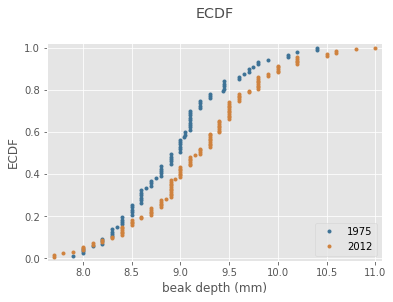

In [ ]:
# Compute ECDFs
x_1975, y_1975 = ecdf(df[df['year']==1975]['Beak depth, mm'])
x_2012, y_2012 = ecdf(df[df['year']==2012]['Beak depth, mm'])

plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')
plt.margins(0.02)
plt.title('ECDF', y= 1.09, alpha=0.7)
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

Through the plots we see that beak depth might be higher now than in 1975. The mean is now 9.19 and was previously 8.96.

Is this sufficient to conclude the beak depth has enlarged during those years?

## Beak Length EDA and sample mean calculation

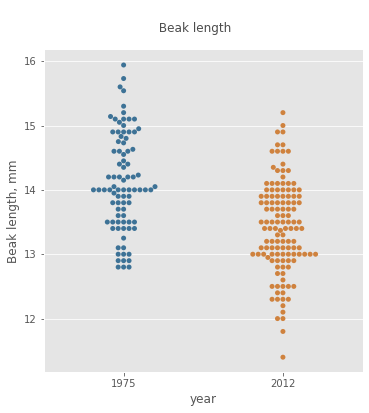

In [ ]:
# Create bee swarm plot for beak length

h = sns.catplot(kind='swarm',data=df, x='year', y='Beak length, mm')
h.fig.suptitle("\n Beak length", y= 1.09, alpha=0.7)

plt.show()

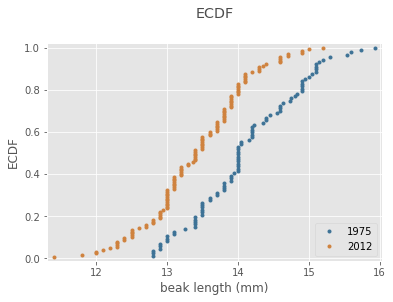

In [ ]:
# Compute ECDFs
x_1975, y_1975 = ecdf(df[df['year']==1975]['Beak length, mm'])
x_2012, y_2012 = ecdf(df[df['year']==2012]['Beak length, mm'])

plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')
plt.margins(0.02)
plt.title('ECDF', y= 1.09, alpha=0.7)
plt.xlabel('beak length (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

Beak length really shows a clear difference between those two years. G. Scandens beak seems to have shortened.

Bee swarm plot depicts an important change, but is this enough to conclude that the beak has really changed? Let's investigate the differences with Inferential statistical analysis.

# Parameter estimation for beak depths

I will statistically compute if the 1975 and 2012 measurements for beak depths have identical probability distribution. (Null hypothesis)

Assuming this hypothesis is true we are going to test the distributions.

First we plotted bee swarm plots ECDFs, then calculate the mean summary statistics. We can also compute sample median, standard deviation and variance. But this may be not enough for conclusions.

We would need to simulate what the data look like if both years where identically distributed. We concantenate data, ignore year labels, scramble the data and relabel the scrambled dataset. This technique is called permutation.

In [ ]:
# Functions to use for permutation of a sample and calculating summary statistic replicas.
# Use for numpy arrays.

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets.
    Use for numpy arrays."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates. Use for numpy arrays."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


In [ ]:
# Boostrapping functions

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def bootstrap_replicate_1d(data, func):
  """Generate bootstrap replicate of 1D data"""
  bs_sample = np.random.choice(data, len(data))
  return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [ ]:
# Separate into different numpy arrays.

depth_1975 = df[df['year']==1975]['Beak depth, mm'].values
depth_2012 = df[df['year']==2012]['Beak depth, mm'].values

## Bootstrapping to compute CI of difference of means.

Firstly we have to compute the difference of mean observed by both datasets.

Secondly, we generate bootstrap samples with replacement and compute  a statistical measure (bootstrap replicas).

Thirdly, calculate the difference of means observed with every bootstrap and compute confidence intervals.

In [ ]:
# Compute observed difference of means
empirical_diff_means = diff_of_means(depth_2012, depth_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(depth_1975, np.mean, 100000)
bs_replicates_2012 = draw_bs_reps(depth_2012, np.mean, 100000)

bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

print('The observed difference of means (mm) between years is: ', empirical_diff_means)
print('95% confidence interval =', conf_int, 'mm')

The observed difference of means (mm) between years is:  0.22622047244094645
95% confidence interval = [0.06031363 0.3927977 ] mm


## Hypothesis Testing of the mean beak depth

We just calculated the boostrapped difference of means, that with 95% confidence interval is higher than 0. This means is highly unlikely both datasets have the same mean. 

But we are not trying to compute only the mean, we need to know if beak depths have identical probability distribution. Under the Null hypothesis . We saw earlier in the Bee swarm plot that the distribution could have higher variance than before. So instead of bootstrapping we use permutation:

In [ ]:
# Draw 100,000 permutation replicates calculating diff of means
perm_replicates = draw_perm_reps(depth_1975, depth_2012,
                                 diff_of_means, size=100000)

# Under the Null hypothesis the probability of having diff of means as extreme
# as it was observed is computed by the p-value:
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0058


The observed difference is unlikely to belong to the same distribution function as in 1975. It seems the difference has not statistical significance to be just by random chance. There is very strong evidence against the Null Hypothesis.

Peaks of G. Scandens are likely to deepen over the past 37 years.

## Hypothesis Testing of the mean beak length

In [ ]:
length_1975 = df[df['year']==1975]['Beak length, mm'].values
length_2012 = df[df['year']==2012]['Beak length, mm'].values

In [ ]:
# Compute observed difference of means
empirical_diff_means_l = diff_of_means(length_1975, length_2012)

# Draw 100,000 permutation replicates calculating diff of means
perm_replicates_l = draw_perm_reps(length_1975, length_2012,
                                 diff_of_means, size=100000)

# Under the Null hypothesis the probability of having diff of means as extreme
# as it was observed is computed by the p-value:
p = np.sum(perm_replicates_l >= empirical_diff_means_l) / len(perm_replicates_l)

# Print the result
print('p-value =', p)

p-value = 0.0


We can conclude that Beak length of G. Scandens had indeed changed.

# Did the mean ratio of peaks changed over time?

The Scandens peaks had gotten deeper and shorter.
Has the mean ratio length-to-depth also changed?

We only need to know if the mean summary statistic has changed but not neccessarily the same distribution, for this we use boostrapping.

## Analysis change through 99% confidence interval 

In [ ]:
# Compute length-to-depth ratios
ratio_1975 = length_1975 / depth_1975
ratio_2012 = length_2012 / depth_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      '.Confidence interval =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      '.Confidence interval =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 .Confidence interval = [1.55661715 1.60108911]
2012: mean ratio = 1.4658342276847767 .Confidence interval = [1.44446159 1.4880191 ]


## Visualization of confidence intervals

In [ ]:
df['peak ratio'] = df['Beak length, mm'] / df['Beak depth, mm']
df.head()

,species,"Beak length, mm","Beak depth, mm",year,peak ratio
0,scandens,13.9,8.4,1975,1.654762
1,scandens,14.0,8.8,1975,1.590909
2,scandens,12.9,8.4,1975,1.535714
3,scandens,13.5,8.0,1975,1.687500
4,scandens,12.9,7.9,1975,1.632911


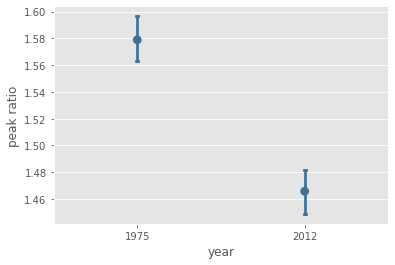

In [ ]:
# Confidence interval in poinplot without bootstrapping

sns.pointplot(x='year', y='peak ratio',
			data=df, capsize=0.01,join=False, estimator=np.mean)
plt.show()

The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

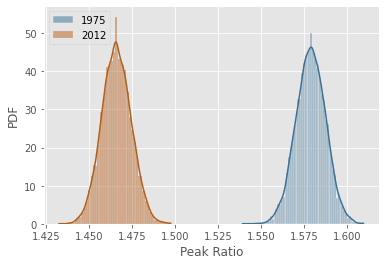

In [ ]:
# Make a histogram of the Confidence interval of the mean.

sns.histplot(bs_replicates_1975, stat='density', kde=True, label='1975')
sns.histplot(bs_replicates_2012, stat='density', kde=True, color='#b45f19', label='2012')
plt.xlabel('Peak Ratio')
plt.ylabel('PDF')
plt.legend()
plt.show()